# Stratified GridSearchCV

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór danych zawierającego zdjęcia twarzy.

In [24]:
from sklearn.datasets import fetch_lfw_people

In [26]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape)

(87, 65)


Narysujmy kilka zdjęć oraz ich etykiety.

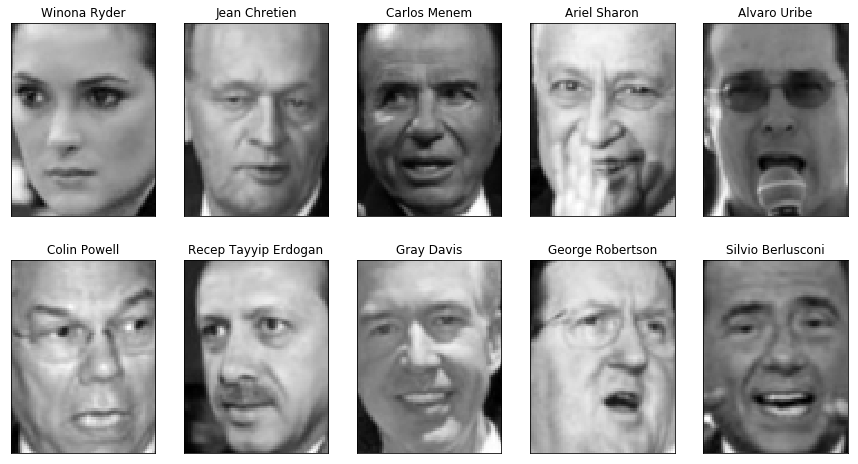

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gist_gray)
    ax.set_title(people.target_names[target])
plt.show() 

In [5]:
people.images[0]

array([[ 57.      ,  60.333332,  78.      , ...,  40.666668,  36.666668,
         34.      ],
       [ 52.666668,  60.      ,  92.      , ...,  46.666668,  36.      ,
         30.      ],
       [ 46.      ,  66.      , 113.333336, ...,  51.      ,  43.333332,
         37.666668],
       ...,
       [ 61.      ,  62.666668,  62.333332, ...,  19.      ,  18.333334,
         18.666666],
       [ 62.666668,  64.666664,  67.      , ...,  17.333334,  18.      ,
         22.333334],
       [ 65.333336,  68.      ,  67.      , ...,  17.333334,  16.666666,
         22.666666]], dtype=float32)

In [6]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [7]:
X = people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = people.target
target_names = people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_features: 5655
n_classes: 62


In [8]:
print(y)

[61 25  9 ... 14 15 14]


Podzielmy zbiór na część testową i treningową .

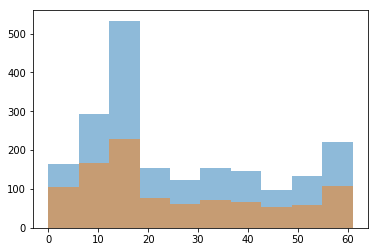

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* BaggingClassifier


```python
param_grid = {'n_estimators': [10,20,50,100],
              'max_samples': [10,20],
              'max_features': [10,20],
             }
```             

In [ ]:
# from sklearn.decomposition import PCA
# print(X_train.shape)
# pca = PCA(n_components=20, whiten=True).fit(X_train)
# X_train_pca = pca.transform(X_train)
# print(X_train_pca.shape)

In [20]:
from sklearn import  metrics


models = []
models.append(('Bagging', grid_1.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

Bagging
precision_score: 0.040786181464445806
recall_score: 0.1713426853707415
f1_score: 0.06292226822517238
accuracy_score: 0.1713426853707415


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Bagging'])
df